# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set()

from scipy import stats

# 2. Load the Data

In [2]:
raw_data = pd.read_excel('../input/tashkent-real-estate-2019/uybor.xlsx')

## 2.1 Copy the Data

In [3]:
data = raw_data.copy()

# 3. EDA

In [4]:
data.head()

,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [5]:
data.shape

(7421, 9)

## 3.1 Checking for NULL values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


In [7]:
data.isnull().sum()

address       0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
lat           0
lng           0
dtype: int64

## 3.2 Explore Features

### 3.2.1 Categorical Features

In [8]:
data['district'].value_counts()

Chilonzor        1629
Mirzo Ulugbek    1360
Yunusobod         873
Uchtepa           870
Mirobod           767
Yakkasaroy        647
Yashnobod         459
Shayhontohur      371
Olmzor            264
Sergeli           159
Yangihayot         14
Bektemir            8
Name: district, dtype: int64

### 3.2.2 Numerical Features

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,7421.0,2.619728,1.076887,1.000000,2.000000,3.000000,3.000000,10.000000
size,7421.0,73.150726,36.999670,14.000000,50.000000,65.000000,85.000000,456.000000
level,7421.0,3.699367,2.239028,1.000000,2.000000,3.000000,5.000000,19.000000
max_levels,7421.0,6.031397,2.607673,1.000000,4.000000,5.000000,9.000000,25.000000
price,7421.0,59117.618919,46701.090308,10500.000000,35000.000000,46500.000000,66847.000000,800000.000000
lat,7421.0,41.303620,0.033771,41.186375,41.281265,41.296388,41.324956,41.424522
lng,7421.0,69.256615,0.059061,69.148915,69.205802,69.260189,69.293713,69.588687


#### 3.2.2.1 `Price`

<AxesSubplot:xlabel='price', ylabel='Count'>

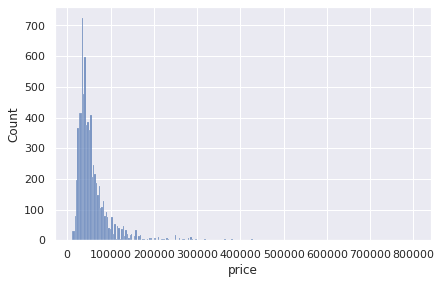

In [10]:
sns.histplot(data['price'])

In [11]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

data = remove_outliers(data, 'price')

Outliers of price are removed



((array([-3.71626264, -3.48573614, -3.35891737, ...,  3.35891737,
          3.48573614,  3.71626264]),
  array([ 10500,  10500,  10500, ..., 112000, 113000, 113500])),
 (19805.736182403827, 48998.96674445741, 0.9666260395441483))

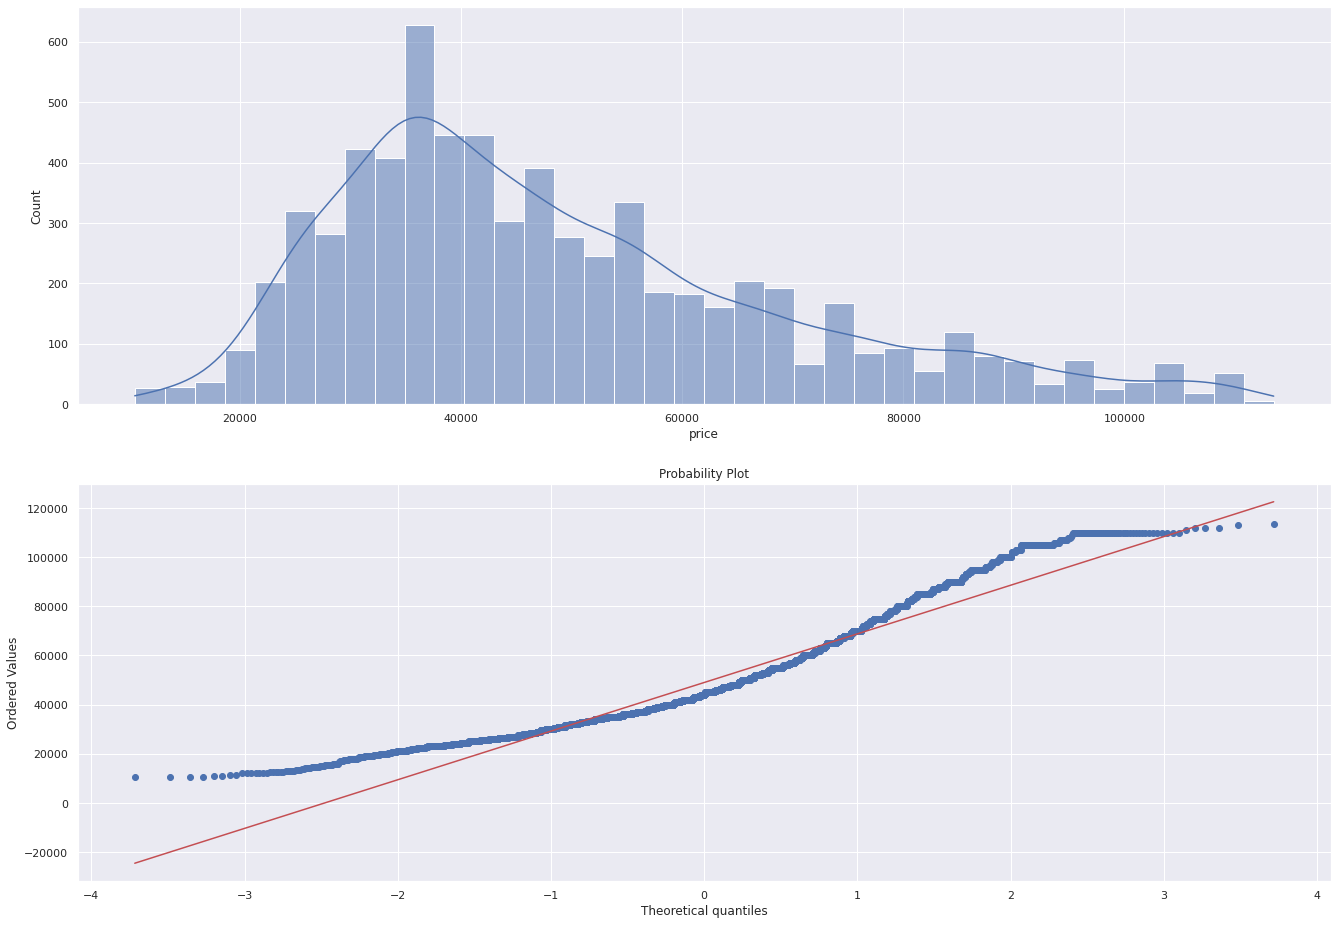

In [12]:
fig = plt.figure(figsize=(20, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(data['price'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1, :])
stats.probplot(data['price'], plot=ax2)

#### 3.2.2.2 `Size`

<AxesSubplot:xlabel='size', ylabel='Count'>

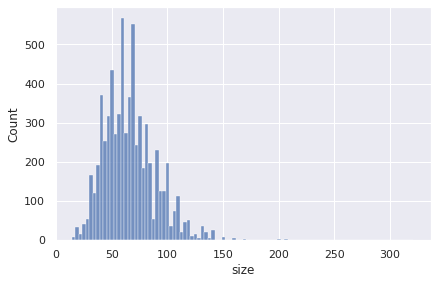

In [13]:
sns.histplot(data['size'])

In [14]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

data = remove_outliers(data, 'size')

Outliers of size are removed



((array([-3.71040274, -3.47953412, -3.35251045, ...,  3.35251045,
          3.47953412,  3.71040274]),
  array([ 14.,  15.,  15., ..., 123., 124., 124.])),
 (20.965384560826557, 64.87184057321988, 0.9919022385129173))

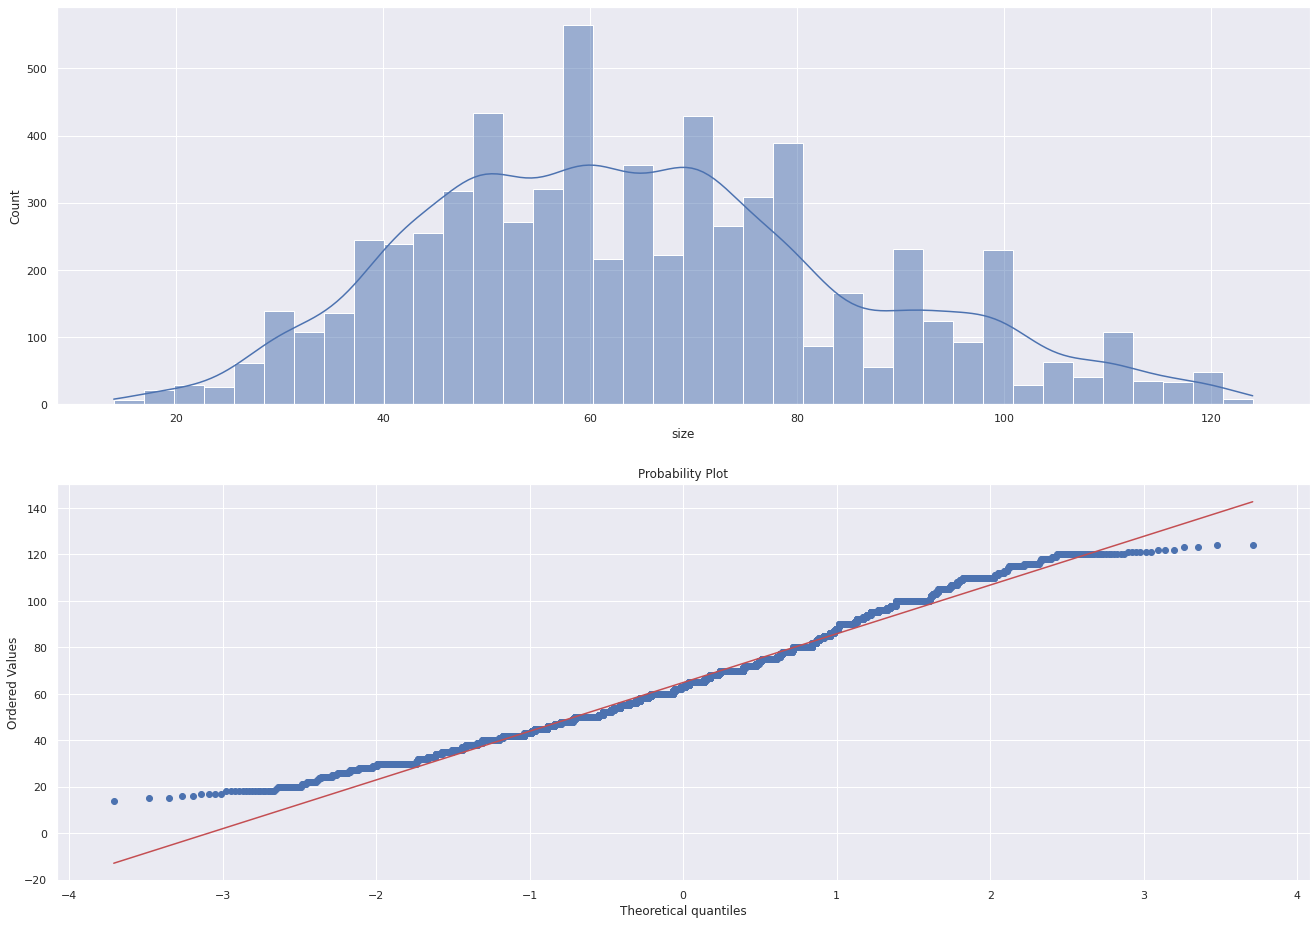

In [15]:
fig = plt.figure(figsize=(20, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(data['size'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1, :])
stats.probplot(data['size'], plot=ax2)

In [16]:
data.shape

(6699, 9)

#### 3.2.2.3 `Rooms`

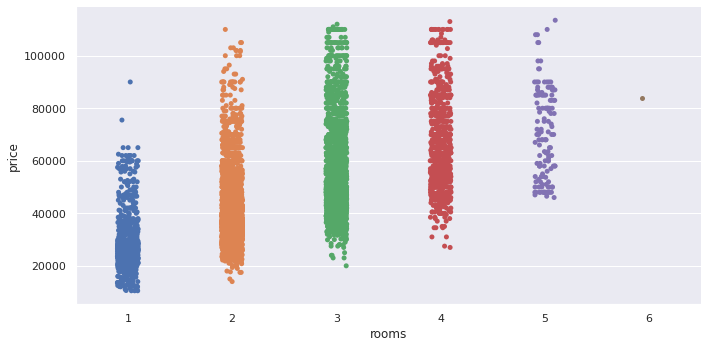

In [17]:
sns.catplot(x='rooms', y='price', data=data, height=5, aspect=2)

<AxesSubplot:xlabel='size', ylabel='price'>

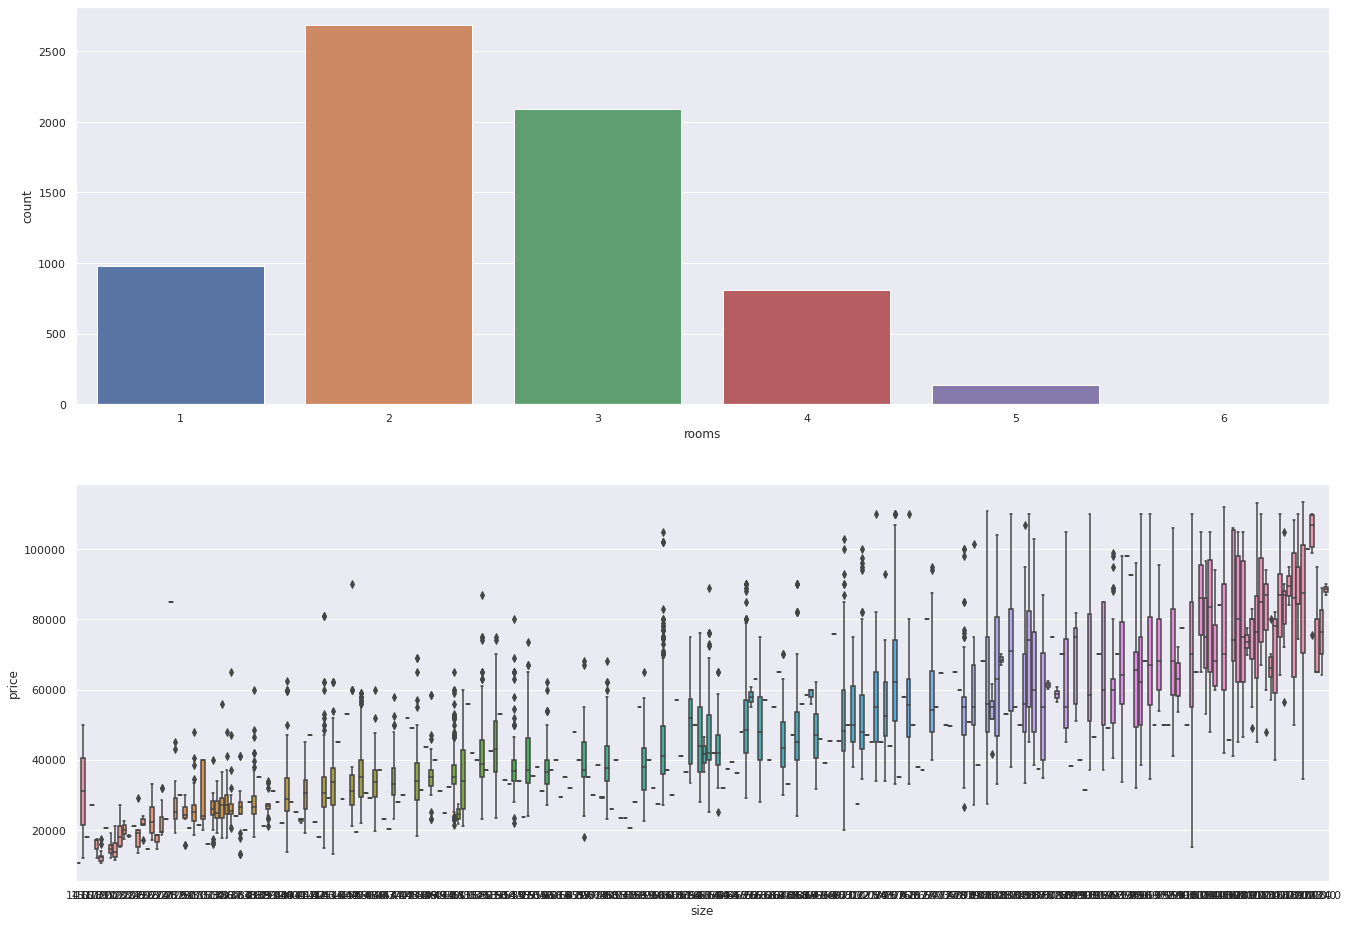

In [18]:
fig = plt.figure(figsize=(20, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

#Countplot
ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=data['rooms'], ax=ax1)

#Boxplot
ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x='size', y='price', data=data, ax=ax2)

In [19]:
data['rooms'].value_counts()

2    2683
3    2088
1     982
4     806
5     139
6       1
Name: rooms, dtype: int64

In [20]:
#Remove outliers
data = data[data.rooms < 6]

In [21]:
data.shape

(6698, 9)

#### 3.2.2.4 `Level`

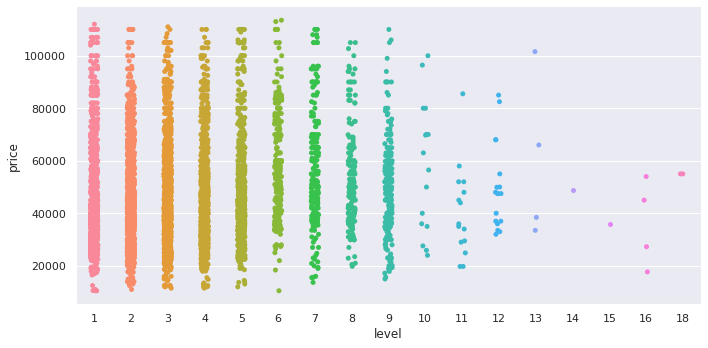

In [22]:
sns.catplot(x='level', y='price', data=data, height=5, aspect=2)

<AxesSubplot:xlabel='level', ylabel='price'>

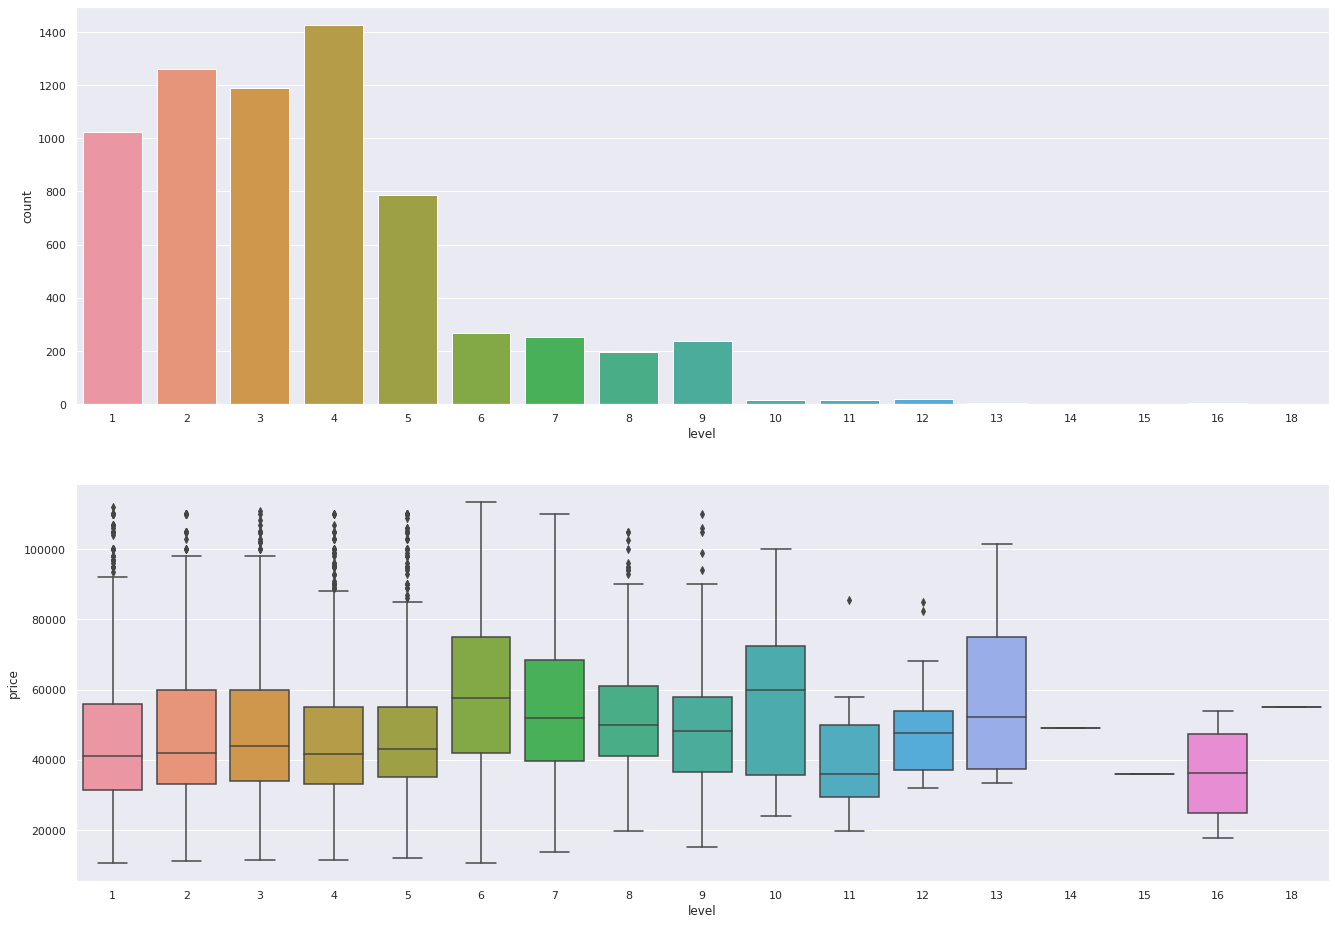

In [23]:
fig = plt.figure(figsize=(20, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

#Countplot
ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=data['level'], ax=ax1)

#Boxplot
ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x='level', y='price', data=data, ax=ax2)

In [24]:
data['level'].value_counts()

4     1424
2     1262
3     1188
1     1023
5      787
6      267
7      251
9      238
8      197
12      18
10      16
11      15
16       4
13       4
18       2
14       1
15       1
Name: level, dtype: int64

In [25]:
#Remove outliers
data = data[data['level'] < 13]

In [26]:
data['level'].value_counts()

4     1424
2     1262
3     1188
1     1023
5      787
6      267
7      251
9      238
8      197
12      18
10      16
11      15
Name: level, dtype: int64

In [27]:
data.shape

(6686, 9)

#### 3.2.2.5 `Max levels`

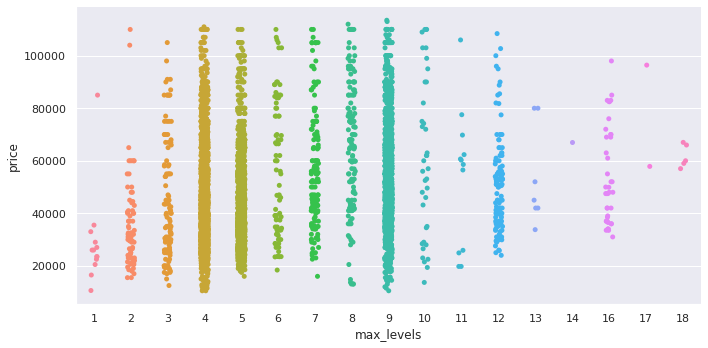

In [28]:
sns.catplot(x='max_levels', y='price', data=data, height=5, aspect=2)

<AxesSubplot:xlabel='max_levels', ylabel='price'>

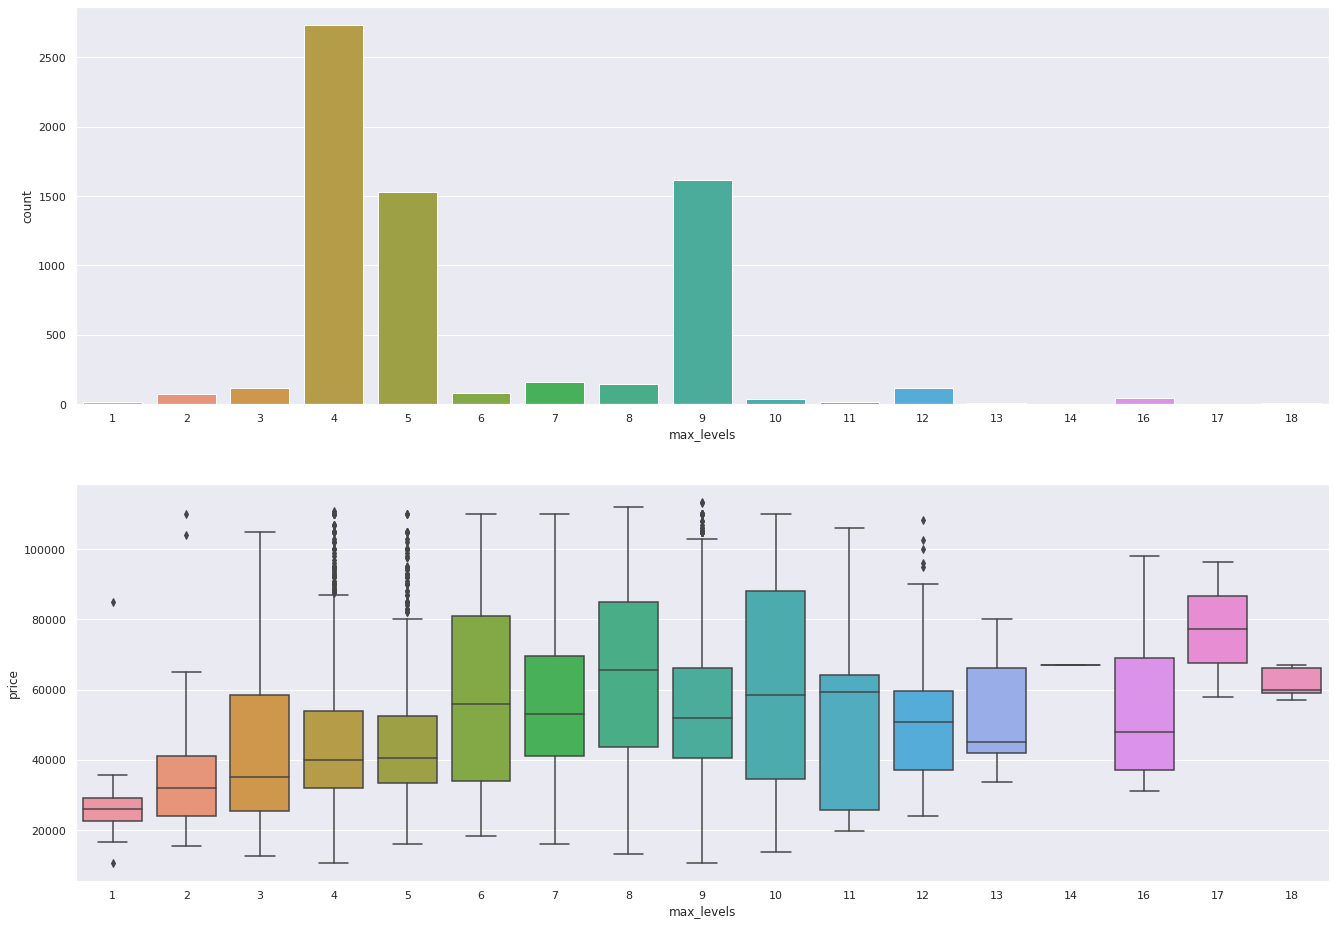

In [29]:
fig = plt.figure(figsize=(20, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

#Countplot
ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=data['max_levels'], ax=ax1)

#Boxplot
ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x='max_levels', y='price', data=data, ax=ax2)

In [30]:
data['max_levels'].value_counts()

4     2730
9     1614
5     1532
7      159
8      145
3      117
12     114
6       83
2       73
16      41
10      38
1       13
11      12
13       7
18       5
17       2
14       1
Name: max_levels, dtype: int64

#### 3.2.2.6 `District`

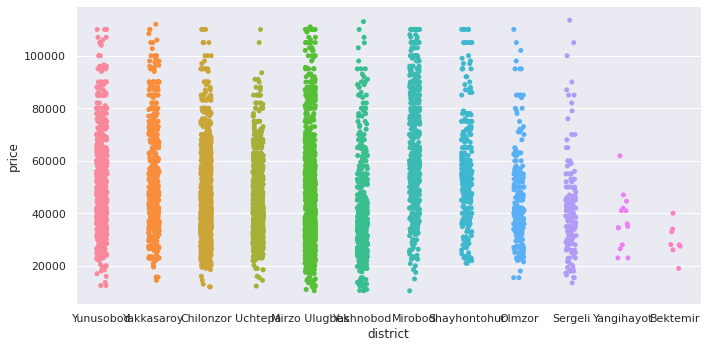

In [31]:
sns.catplot(x='district', y='price', data=data, height=5, aspect=2)

<AxesSubplot:xlabel='district', ylabel='price'>

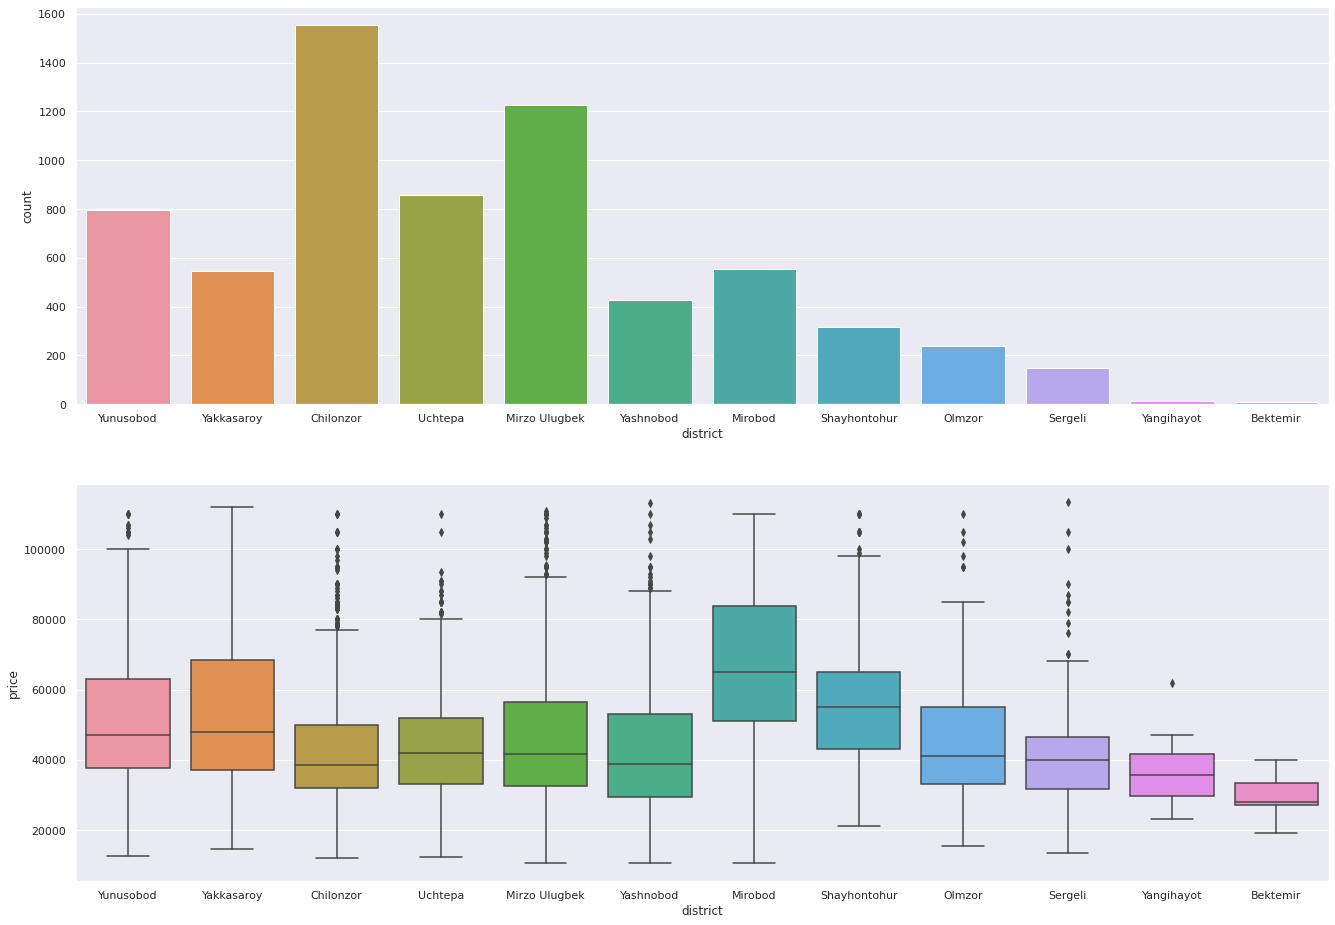

In [32]:
fig = plt.figure(figsize=(20, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

#Countplot
ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=data['district'], ax=ax1)

#Boxplot
ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x='district', y='price', data=data, ax=ax2)

### 3.2.2.7 `Latitude and Longitude`

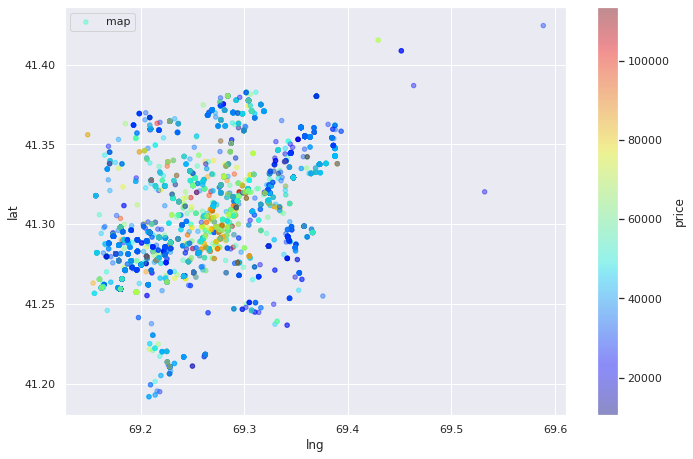

In [33]:
data.plot(kind='scatter', x='lng', y='lat', alpha=0.4,
            label='map', figsize=(10, 7),
            c='price',
            cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

## 3.3 Remove Features

In [34]:
data.drop('address', axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
data.head()

,district,rooms,size,level,max_levels,price,lat,lng
0,Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [36]:
dummies = pd.get_dummies(data['district'])
dummies

,Bektemir,Chilonzor,Mirobod,Mirzo Ulugbek,Olmzor,Sergeli,Shayhontohur,Uchtepa,Yakkasaroy,Yangihayot,Yashnobod,Yunusobod
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7416,0,0,0,0,0,0,0,0,0,0,1,0
7417,0,0,0,0,0,0,0,0,0,0,1,0
7418,0,0,0,0,0,0,1,0,0,0,0,0
7419,0,0,0,1,0,0,0,0,0,0,0,0


In [37]:
data.drop('district', axis=1, inplace=True)
data = pd.concat([data, dummies], axis=1)

data.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rooms,size,level,max_levels,price,lat,lng,Bektemir,Chilonzor,Mirobod,Mirzo Ulugbek,Olmzor,Sergeli,Shayhontohur,Uchtepa,Yakkasaroy,Yangihayot,Yashnobod,Yunusobod
0,3,57.0,4,4,52000,41.371471,69.281049,0,0,0,0,0,0,0,0,0,0,0,1
1,2,52.0,4,5,56000,41.291115,69.261104,0,0,0,0,0,0,0,0,1,0,0,0
2,2,42.0,4,4,37000,41.280784,69.223683,0,1,0,0,0,0,0,0,0,0,0,0
3,3,65.0,1,4,49500,41.290163,69.196862,0,1,0,0,0,0,0,0,0,0,0,0
4,3,70.0,3,5,55000,41.300156,69.210831,0,1,0,0,0,0,0,0,0,0,0,0


## 3.4 Look for correlations

In [38]:
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
size             0.747329
rooms            0.623716
Mirobod          0.287518
max_levels       0.241888
level            0.091394
Shayhontohur     0.088083
Yakkasaroy       0.069802
Yunusobod        0.061218
lng              0.051205
lat              0.033654
Olmzor          -0.025446
Yangihayot      -0.025811
Bektemir        -0.032782
Mirzo Ulugbek   -0.035324
Sergeli         -0.045219
Yashnobod       -0.065595
Uchtepa         -0.081329
Chilonzor       -0.157148
Name: price, dtype: float64

# 4. Prepare Data for Model

In [39]:
data.shape

(6686, 19)

In [40]:
data.head()

,rooms,size,level,max_levels,price,lat,lng,Bektemir,Chilonzor,Mirobod,Mirzo Ulugbek,Olmzor,Sergeli,Shayhontohur,Uchtepa,Yakkasaroy,Yangihayot,Yashnobod,Yunusobod
0,3,57.0,4,4,52000,41.371471,69.281049,0,0,0,0,0,0,0,0,0,0,0,1
1,2,52.0,4,5,56000,41.291115,69.261104,0,0,0,0,0,0,0,0,1,0,0,0
2,2,42.0,4,4,37000,41.280784,69.223683,0,1,0,0,0,0,0,0,0,0,0,0
3,3,65.0,1,4,49500,41.290163,69.196862,0,1,0,0,0,0,0,0,0,0,0,0
4,3,70.0,3,5,55000,41.300156,69.210831,0,1,0,0,0,0,0,0,0,0,0,0


In [41]:
data['price'].astype('int')

0       52000
1       56000
2       37000
3       49500
4       55000
        ...  
7416    24500
7417    32000
7418    40000
7419    11000
7420    22914
Name: price, Length: 6686, dtype: int64

## 4.1 Stratified Sampling

In [42]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=21)

In [43]:
train_feat = train_set.drop('price', axis=1)
train_labels = train_set['price']

In [44]:
train_feat = train_feat.values
train_labels = train_labels.values

# 5. Build a model

## 5.1 Linear Model

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_feat, train_labels)

LinearRegression()

### 5.1.1 Evaluate Linear model

In [46]:
from sklearn.metrics import mean_squared_error

train_pred = lin_reg.predict(train_feat)
lin_mse = mean_squared_error(train_pred, train_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

11778.029022264422

## 5.2 Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_feat, train_labels)

DecisionTreeRegressor()

### 5.2.1 Evaluate Tree model

In [48]:
train_pred = tree_reg.predict(train_feat)
tree_mse = mean_squared_error(train_pred, train_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1560.1211670042544

### 5.2.2 Better Evaluation using KFold CV

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_feat, train_labels,
                         scoring='neg_mean_squared_error', cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [50]:
def scores_display(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())
    
scores_display(tree_rmse_scores)

Scores:  [12547.32356758 13083.68263249 13821.86001474 12518.54398647
 12706.44144207]
Mean:  12935.570328667822
Standard deviation:  486.74289443855895


## 5.3 Random Forest 

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_feat, train_labels)

RandomForestRegressor()

### 5.3.1 Evaluate Random Forest model

In [52]:
forest_pred = forest_reg.predict(train_feat)
forest_mse = mean_squared_error(train_pred, train_labels)
forest_rmse = np.sqrt(forest_mse)
#forest RMSE on train set (usually lower than validation set)
forest_rmse

1560.1211670042544

### 5.3.2 Better Evaluation using KFold Cross Validation

In [53]:
forest_scores = cross_val_score(forest_reg, train_feat, train_labels,
                                scoring='neg_mean_squared_error', cv=5)
forest_rmse = np.sqrt(-forest_scores)

scores_display(forest_rmse)

Scores:  [ 8972.15752399  9848.13853126 10235.25006737  9361.34203669
  9173.43028379]
Mean:  9518.063688620072
Standard deviation:  461.44406033853306


# 6. Fine-tune model

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [55]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(train_feat, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [57]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [58]:
cv_results = grid_search.cv_results_

for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(np.sqrt(-mean_score), params)

10756.100244284544 {'max_features': 2, 'n_estimators': 3}
9742.598635922619 {'max_features': 2, 'n_estimators': 10}
9295.714280452392 {'max_features': 2, 'n_estimators': 30}
10782.784859846695 {'max_features': 4, 'n_estimators': 3}
9674.64540711885 {'max_features': 4, 'n_estimators': 10}
9347.410651502318 {'max_features': 4, 'n_estimators': 30}
10830.102501037158 {'max_features': 6, 'n_estimators': 3}
9624.262942983103 {'max_features': 6, 'n_estimators': 10}
9310.279112210363 {'max_features': 6, 'n_estimators': 30}
10767.039064353286 {'max_features': 8, 'n_estimators': 3}
9557.582845528308 {'max_features': 8, 'n_estimators': 10}
9440.501871540324 {'max_features': 8, 'n_estimators': 30}
10682.778425504832 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
9695.149399573926 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
10702.722243051265 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
9656.441702998602 {'bootstrap': False, 'max_features': 3, 'n_estimators

# 7. Evaluate on the Test set

In [59]:
final_model = grid_search.best_estimator_

test_feat = test_set.drop('price', axis=1)
test_labels = test_set['price'].copy()

test_pred = final_model.predict(test_feat)

final_mse = mean_squared_error(test_labels, test_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


8924.404170583031

Our model achievied: RMSE = $ 8872.08 error for an average price prediction

# 8. Save model

In [60]:
import joblib

joblib.dump(final_model, 'RFR.jbl')

['RFR.jbl']